In [1]:
import pandas as pd
dataset=pd.read_csv("/content/Social_Network_Ads.csv")
df=pd.DataFrame(dataset)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [3]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
X=df.drop(["Purchased"],axis=1)
y=df.iloc[:,4]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
#kernel='linear'--> gives less accuracy
model.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
y_pred=model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.95

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[55,  1],
       [ 3, 21]])

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_proba=model.predict_proba(X_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.2 0.2 0.2 0.4 0.  0.  0.  0.8 0.  0.8 0.  0.  0.  0.4 0.  0.8 0.2 0.
 0.8 0.2 0.  1.  0.4 0.6 0.  1.  0.  0.  0.  0.4 0.  0.4 0.8 0.  0.  0.
 0.  0.  0.  1.  0.2 0.  0.  0.2 0.6 0.  0.  1.  0.  0.8 1.  0.4 0.2 1.
 0.8 1.  0.4 0.  0.8 0.  0.2 1.  0.  0.8 0.  0.8 0.4 0.  0.2 0.2 0.8 0.
 0.  1.  0.2 0.  0.4 0.4 1.  0.8]


In [14]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [15]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("area under the curve for first model:",roc_auc)

area under the curve for first model: 0.9702194357366771


Text(0, 0.5, 'true positive rate(Sensitivity)')

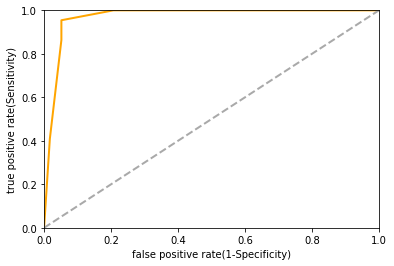

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false positive rate(1-Specificity)')
plt.ylabel('true positive rate(Sensitivity)')